Airplan

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier, Pool
from sklearn.metrics import roc_auc_score, roc_curve

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Убираем ограничение отображемых колонок
pd.options.display.max_columns = None

### Загрузка данных

In [3]:
PATH = "../"
PATH_DATASETS = PATH + "datasets/"
train_filename = PATH_DATASETS + "train_dataset_Самолет.csv"

In [4]:
df_train = pd.read_csv(train_filename, parse_dates=["report_date"])
df_train.shape

D:\_Work\_Projects\_Conda\School\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,131,132,133,135,136,139,140,141,142,143,144,145,146,147,148,149,151,152,155,156,157,158,159,160,161,163,164,165,167,168,169,171,172,173,174,175,176,177,178,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,223,224,227,239,240,241,242,243,244,245,246,459,460,461,467,468,469,515,516,523,524,531,532,539,540,547,548,555,556,563,564,565,567,571,572,573,575,579,580,581,582,583,587,588,595,596,603,604,611,612,613,615,795,796,797,799,821,822,825,826,1031,1032,1033,1034,1035,1036,1037,1039,1040,1041,1042,1043,1044,1045,1047,1048,1049,1050,1051,1052,1055,1056,1057,1058,1059,1060,1063,1064,1065,1067,1068,1069,1072,1073,1074,1075,1076,1077,1078,1172,1173,1174,1176,1177,1178,1179,1180,1181,1182,1275,1276,1277,1278

(14456, 2666)

In [5]:
# Проверяем дисбаланс класса
df_train["target"].value_counts()

0    14020
1      436
Name: target, dtype: int64

In [6]:
df_train[df_train["client_id"] == 2326]

report_date  client_id  target  col1  col2  col3  col4  col5  col6  \
1751   2022-01-01       2326       1   NaN   NaN   NaN   NaN   NaN   NaN   
2355   2021-12-01       2326       1   NaN   NaN   NaN   NaN   NaN   NaN   
3254   2021-02-01       2326       0   NaN   NaN   NaN   NaN   NaN   NaN   
12139  2021-11-01       2326       1   NaN   NaN   NaN   NaN   NaN   NaN   

       col7  col8  col9  col10  col11  col12  col13  col14  col15  col16  \
1751    NaN   NaN   NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2355    NaN   NaN   NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
3254    NaN   NaN   NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
12139   NaN   NaN   NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

       col17  col18  col19  col20  col21  col22  col23  col24  col25  col26  \
1751     NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2355     NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
3254     NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
12139    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

       col27  col28  col29  col30  col31  col32  col33  col34  col35  col36  \
1751     NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2355     NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
3254     NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
12139    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

       col37  col38  col39  col40  col41  col42  col43  col44  col45  col46  \
1751     NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2355     NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
3254     NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
12139    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

       col47  col48 col49 col50 col51 col52 col53 col54 col55 col56 col57  \
1751     NaN    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2355     NaN    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
3254     NaN    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
12139    NaN    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

      col58 col59 col60 col61 col62 col63 col64  col65  col66  col67  col68  \
1751    NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN    NaN    NaN    NaN   
2355    NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN    NaN    NaN    NaN   
3254    NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN    NaN    NaN    NaN   
12139   NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN    NaN    NaN    NaN   

       col69  col70  col71  col72  col73  col74  col75  col76  col77  col78  \
1751     NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2355     NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
3254     NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
12139    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

       col79  col80  col81  col82  col83  col84 col85 col86 col87 col88 col89  \
1751     NaN    NaN    NaN    NaN    NaN    NaN   NaN   NaN   NaN   NaN   NaN   
2355     NaN    NaN    NaN    NaN    NaN    NaN   NaN   NaN   NaN   NaN   NaN   
3254     NaN    NaN    NaN    NaN    NaN    NaN   NaN   NaN   NaN   NaN   NaN   
12139    NaN    NaN    NaN    NaN    NaN    NaN   NaN   NaN   NaN   NaN   NaN   

      col90 col91 col92 col93 col94 col95 col96 col97 col98 col99 col100  \
1751    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN   
2355    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN   
3254    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN   
12139   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN   

       col101  col102  col103  col104  col105  col106  col107  col108  col109  \
1751      

In [7]:
# Для бейзлайна выделяем не смотрим историю а только сведения о последнем отчете по пользователю
df_train = df_train.sort_values('report_date').groupby('client_id').tail(1)

In [8]:
# Проверяем дисбаланс класса
df_train["target"].value_counts()

0    4634
1     183
Name: target, dtype: int64

In [9]:
# Смотрим сколько признаков имеют NaN для большинства объектов
nan_df = df_train[df_train["target"] == 1].isna().sum()
drop_columns = list(nan_df[nan_df > 90].index)
nan_df[nan_df > 90]

col1       183
col2       183
col3       183
col4       183
col5       183
          ... 
col2652    113
col2653    113
col2657    172
col2658    172
col2659    172
Length: 2169, dtype: int64

In [10]:
# Исключаем признаки со слабым 
df_train = df_train.drop(columns=drop_columns, errors='ignore')
df_train.shape

(4817, 497)

In [11]:
# Не числове признаки 
desc_cols = df_train.describe().columns
set(df_train.columns) - set(desc_cols)

{'col1454', 'report_date'}

In [12]:
# Анализ col1454
print(len(df_train), len(df_train['client_id'].unique()), df_train['col1454'].unique().shape)
df_train[df_train['col1454'] == '01febac0-b083-494e-8589-f98400074b94']

4817 4817 (4817,)


,report_date,client_id,target,col1453,col1454,col1455,col1456,col1457,col1458,col1459,col1460,col1461,col1462,col1463,col1464,col1465,col1466,col1467,col1468,col1469,col1470,col1471,col1472,col1473,col1474,col1475,col1476,col1477,col1478,col1479,col1480,col1481,col1482,col1483,col1484,col1485,col1486,col1487,col1488,col1489,col1490,col1491,col1492,col1493,col1494,col1495,col1496,col1497,col1498,col1499,col1500,col1501,col1502,col1503,col1504,col1505,col1506,col1507,col1508,col1509,col1510,col1511,col1512,col1513,col1514,col1515,col1516,col1517,col1518,col1519,col1520,col1521,col1522,col1523,col1524,col1525,col1526,col1527,col1528,col1529,col1530,col1531,col1532,col1533,col1534,col1535,col1536,col1537,col1538,col1539,col1540,col1541,col1542,col1543,col1544,col1545,col1546,col1547,col1548,col1549,col1550,col1551,col1552,col1553,col1554,col1555,col1556,col1557,col1558,col1559,col1560,col1561,col1562,col1563,col1564,col1565,col1566,col1567,col1568,col1569,col1570,col1571,col1572,col1573,col1574,col1575,col1576,col1577,col1578,col1579,col1580,col1581,col1582,col1583,col1584,col1585,col1586,col1587,col1588,col1589,col1590,col1591,col1592,col1593,col1594,col1595,col1596,col1597,col1598,col1599,col1600,col1601,col1602,col1603,col1604,col1605,col1606,col1607,col1608,col1609,col1610,col1611,col1612,col1613,col1614,col1615,col1616,col1617,col1618,col1619,col1620,col1621,col1622,col1623,col1624,col1625,col1626,col1627,col1628,col1629,col1630,col1631,col1632,col1633,col1634,col1635,col1636,col1637,col1638,col1639,col1640,col1641,col1642,col1643,col1644,col1645,col1646,col1823,col1824,col1825,col1826,col1827,col1828,col1829,col1830,col1831,col1832,col1833,col1834,col1835,col1836,col1837,col1838,col1839,col1840,col1841,col1842,col1843,col1844,col1845,col1846,col1847,col1848,col1849,col1850,col1851,col1852,col1853,col1854,col1855,col1856,col1857,col1858,col1859,col1860,col1861,col1862,col1863,col1864,col1865,col1866,col1867,col1868,col1869,col1870,col1871,col1872,col1873,col1874,col1875,col1876,col1877,col1878,col1879,col1880,col1881,col1882,col1883,col1884,col1885,col1886,col1887,col1888,col1889,col1890,col1891,col1892,col1893,col1894,col1895,col1896,col1897,col1898,col1899,col1900,col1901,col1902,col1903,col1904,col1905,col1906,col1907,col1908,col1909,col1910,col1911,col1912,col1913,col1914,col1915,col1916,col1917,col1918,col1919,col1920,col1921,col1922,col1923,col1924,col1925,col1926,col1927,col1928,col1929,col1930,col1931,col1932,col1933,col1934,col1935,col1936,col1937,col1938,col1939,col1940,col1941,col1942,col2167,col2168,col2169,col2170,col2171,col2172,col2173,col2174,col2175,col2176,col2177,col2178,col2179,col2180,col2181,col2182,col2183,col2184,col2185,col2186,col2187,col2188,col2189,col2190,col2211,col2212,col2213,col2214,col2215,col2216,col2220,col2221,col2222,col2235,col2236,col2237,col2238,col2239,col2240,col2244,col2245,col2246,col2283,col2284,col2285,col2286,col2287,col2288,col2292,col2293,col2294,col2307,col2308,col2309,col2310,col2311,col2312,col2316,col2317,col2318,col2331,col2332,col2333,col2334,col2335,col2336,col2340,col2341,col2342,col2355,col2356,col2357,col2358,col2359,col2360,col2364,col2365,col2366,col2379,col2380,col2381,col2382,col2383,col2384,col2388,col2389,col2390,col2412,col2413,col2414,col2436,col2437,col2438,col2451,col2452,col2453,col2454,col2455,col2456,col2460,col2461,col2462,col2467,col2468,col2470,col2479,col2480,col2481,col2482,col2483,col2484,col2485,col2486,col2487,col2488,col2489,col2490,col2491,col2492,col2493,col2494,col2495,col2496,col2497,col2498,col2499,col2500,col2501,col2502,col2503,col2504,col2505,col2506,col2507,col2508,col2509,col2510,col2511,col2512,col2513,col2514,col2515,col2516,col2517,col2518,col2519,col2520,col2521,col2522,col2523,col2524,col2525,col2526,col2527,col2528,col2529,col2530,col2531,col2532,col2533,col2534,col2558,col2559,col2560,col2564,col2565,col2566,col2582,col2583,col2584,col2588,col2589,col2590,col2654,col2655,col2656,col2660,col2661,col2662,col2663
1,2022-11-01,5,0,1

In [13]:
# Итого принимаем, что col1454 это по сути и есть клиент, поэтому это притендент на удаление
# Переводим категорию в числа 
df_train["col1454"], _ = pd.factorize(df_train['col1454'])

### Матрица корреляции

In [14]:
%%time
# Делаем для 50 первых столбцов
corr_matrix = df_train.corr()

Wall time: 2.84 s


In [15]:
# %%time
# plt.figure(figsize=(16, 14))
# heatmap = sns.heatmap(corr_matrix, vmin=-1, vmax=1, cmap='RdBu')
# heatmap.set_title('Матрица корреляции');

In [16]:
# Топ признаков влияющие на таргет
corr_matrix[corr_matrix['target'].abs() > 0.15]['target']

target     1.000000
col1454   -0.184996
col1456    0.197509
col1461    0.210049
col1464    0.197834
col1469    0.210504
col1488    0.213133
col1493    0.226479
col2307    0.152058
col2355    0.170057
col2356    0.173631
col2357    0.175202
col2358    0.165918
col2359    0.178403
col2360    0.175130
col2365    0.152984
col2366    0.152120
col2382    0.164627
col2384    0.156313
col2388    0.153466
col2412    0.159134
col2413    0.158391
col2414    0.160920
Name: target, dtype: float64

### Пропуски в данных 

In [17]:
target_column = 'target'
report_date_column = 'report_date'
feature_columns = list(set(df_train.columns) - set([report_date_column]) - set([target_column]))

In [18]:
# Проверяем, что пропуски данных это не особенность целевого таргета (банкротсва)
nan_contains = df_train[df_train['target'] == 1].isna().sum()
pd.DataFrame(nan_contains[nan_contains > 0]).sort_values(by=0)

,0
col2390,1
col2364,1
col2342,1
col2341,1
col2340,1
...,...
col1907,87
col1908,87
col1909,87
col1897,87


In [19]:
# Поиск константных признаков
constant_features = []
# Продвинутый способ. За константу также принимаем те признаки у которых больше 99,9% значений в одном значении
for column in feature_columns:
    unique_labels, counts = np.unique(df_train[column].values, return_counts=True)
    proportions = counts / len(df_train[column].values)
    if max(proportions > 0.995) and len(proportions) <= 2:
        print(f"column: {column}, imbalance > 0.995, proportions: {len(proportions)}, ({proportions[:2]})")
        constant_features.append(column)
if len(constant_features) == 0: 
    print("Константные признаки не обнауржены")

Константные признаки не обнауржены


In [20]:
# # Проверяем уровень значимости p-value и уровень корреляции с целевой функцией
# high_p_value = []

# for column in feature_columns:
#     feat = df_train[column]
#     target = df_train[target_column]
#     res = stats.pearsonr(feat, target)
#     corr, p_value = res
#     if p_value > 0.05 and abs(corr) < 0.01:
#         high_p_value.append(column)         
#         print(f"column: {column}, p_value ({p_value}) > 0.05, corr ({abs(corr)}) < 0.01")

In [21]:
# Заполняем медианными значениями
# nan_contains = df_train.isna().sum()
# for column in list(nan_contains[nan_contains > 0].index):
#     # df_train[column] = df_train[column].fillna(df_train[column].median())
# Заполняем пропуски частовстречающимися значениями
df_train = df_train.apply(lambda x:x.fillna(x.value_counts().index[0]))

In [22]:
# Проверяем что не осталось NaN
nan_df = df_train.isna().sum()
nan_df[nan_df > 0]

Series([], dtype: int64)

In [23]:
train_data, val_data = train_test_split(df_train, test_size=0.2, shuffle=True, random_state=53, stratify=df_train[target_column]) 
val_data, test_data = train_test_split(val_data, test_size=0.5, shuffle=True, random_state=53, stratify=val_data[target_column]) 
train_data.shape, val_data.shape, test_data.shape

((3853, 497), (482, 497), (482, 497))

In [24]:
# Проверяем дисбаланс разбиения train/val/test
train_data["target"].value_counts(), val_data["target"].value_counts(), test_data["target"].value_counts()

(0    3707
 1     146
 Name: target, dtype: int64,
 0    464
 1     18
 Name: target, dtype: int64,
 0    463
 1     19
 Name: target, dtype: int64)

In [25]:
X_train = train_data[feature_columns]
y_train = train_data[target_column]

X_val = val_data[feature_columns]
y_val = val_data[target_column]

X_test = test_data[feature_columns]
y_test = test_data[target_column]

In [26]:
model = CatBoostClassifier(eval_metric = "AUC", early_stopping_rounds=200)
model.fit(X_train, y_train, eval_set=(X_val, y_val), plot=True, verbose=False)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [27]:
# Вывод графика ROC-AUC
def plot_roc_auc(y_true, y_pred):
    fpr, tpr, _ = roc_curve(y_true=y_true, y_score=y_pred)
    roc_auc = roc_auc_score(y_true=y_true, y_score=y_pred)

    plt.figure(figsize=(10, 3))
    plt.plot(fpr, tpr, color='darkorange',
             lw=2, label='ROC curve (area = %0.4f)' % roc_auc, alpha=0.5)

    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', alpha=0.5)

    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(True)
    plt.xlabel('False Positive Rate', fontsize=12)
    plt.ylabel('True Positive Rate', fontsize=12)
    plt.title('Receiver operating characteristic', fontsize=16)
    plt.legend(loc="lower right", fontsize=12)
    plt.show()
    return roc_auc

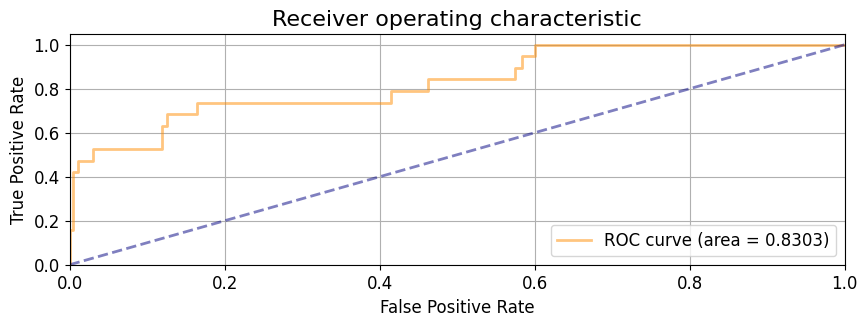

0.8302830510401273

In [28]:
# Для рассчета ROC-AUC на baseline моделе используем тестовые данные
y_pred = model.predict_proba(X_test)[:,1]
# Строим график ROC-AUC
roc_auc = plot_roc_auc(y_true=y_test, y_pred=y_pred)
roc_auc

In [29]:
# train_data[train_data["target"] == 1]

In [30]:
# Вывод графика feature importance
def plot_feature_importance(importance, names, model_name="", top_n=-1, skip_columns=[]):
    """Функция вывода feature importance
        :importance - массив важности фичей, полученный от модели
        :names - массив названий фичей
        :model_name - название модели
        :top_n - кол-во выводимых фичей
        :skip_columns: какие фичи пропустить, такое может понадобиться чтобы временно убрать 
                        из отображаемых горячие фичи, и изучить менее сильные
        :return - fi_df - feature importance датафрейм
    """
    feature_importance = np.array(importance)
    feature_names = np.array(names)
    
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)
    fi_df = fi_df[~fi_df['feature_names'].isin(skip_columns)]
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    
    plt.figure(figsize=(10,8))
    sns.barplot(x=fi_df['feature_importance'][:top_n], y=fi_df['feature_names'][:top_n])
    if top_n != -1:
        plt.title(f"{model_name} FEATURE IMPORTANCE (Top: {top_n})")
    else:
        plt.title(f"{model_name} FEATURE IMPORTANCE")
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')
    return fi_df

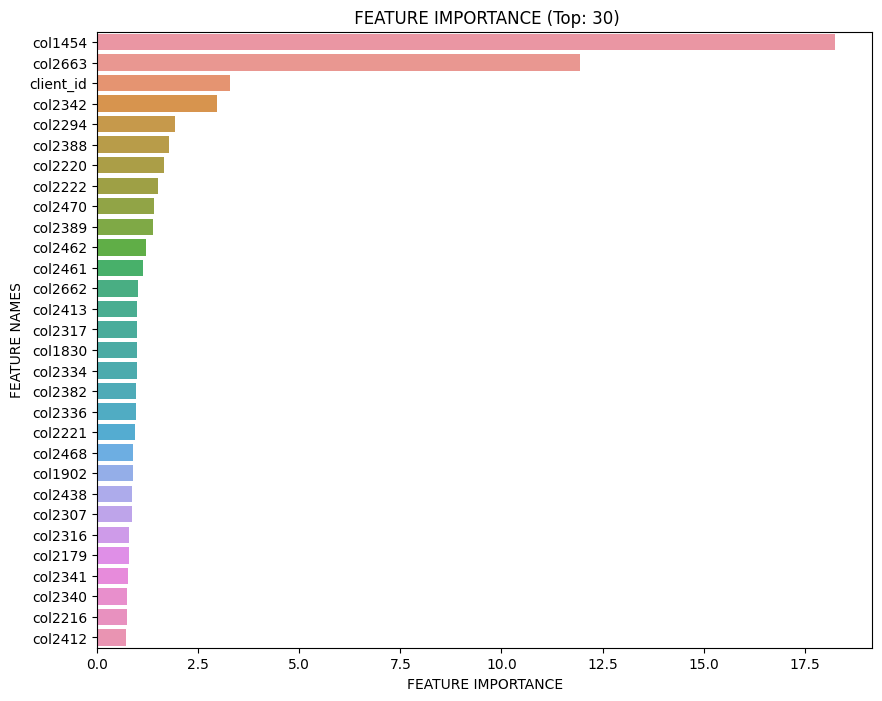

In [31]:
dfi = plot_feature_importance(model.get_feature_importance(), X_test.columns, top_n=30) 

In [32]:
dfi[:30]

,feature_names,feature_importance
281,col1454,18.254746
71,col2663,11.936857
186,client_id,3.285313
185,col2342,2.973957
475,col2294,1.924837
423,col2388,1.765248
79,col2220,1.652421
472,col2222,1.498044
352,col2470,1.410039
342,col2389,1.374519


### Feature engineering 